# Neural Network with SMOTE

This notebook trains a neural network on the dataset preprocessed with SMOTE. This aims to compare the performance of oversampling (SMOTE) vs. class weighting for Neural Networks.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, accuracy_score

from src.preprocessing_pipeline import build_preprocessed_data

2025-12-03 23:05:22.801898: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-03 23:05:22.842267: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-03 23:05:22.842295: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-03 23:05:22.845193: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-03 23:05:22.853437: I tensorflow/core/platform/cpu_feature_guar

In [2]:
print("Loading and preprocessing data (WITH SMOTENC)...")
data = build_preprocessed_data(
    use_smote=True,
    smote_strategy='smotenc',
    impute_strategy='subgroup_mean',
    smote_minority_n=50_000,
    smote_majority_cap=100_000
)

# Ensure correct types
X_train = data["X_train_std"].astype('float32')
y_train = data["Y_train"].astype('int32')
X_val = data["X_val_std"].astype('float32')
y_val = data["Y_val"].astype('int32')
X_test = data["X_test_std"].astype('float32')
y_test = data["Y_test"].astype('int32')

print("Training shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Loading and preprocessing data (WITH SMOTENC)...
[Memory] Pipeline start: 0.65 GB
Loading the file using Polars...
File loaded successfully with Polars. Shape: (2302521, 308)
Converted the Polars DataFrame to Pandas.
[Memory] After data load: 25.07 GB
Loaded 2302521 rows

Pre-sampling for SMOTE (minority_n=50000, majority_cap=100000)...
Original class distribution:
FIRE_SIZE_LABEL
small         2241807
medium          55930
large            3682
very large       1102
Name: count, dtype: int64
  small: sampled 100000 from 2241807
  medium: sampled 50000 from 55930
  large: sampled 3682 from 3682
  very large: sampled 1102 from 1102
Total sampled: 154784 rows
[Memory] After sampling: 18.79 GB
Imputing with subgroup mean (GACC_PL)...

Applying SMOTENC on pre-sampled data...
[Memory] Before SMOTENC: 16.35 GB
SMOTENC input shape: (92870, 45)
Class distribution before SMOTE:
FIRE_SIZE_LABEL
0    59995
1    29993
2     2219
3      663
Name: count, dtype: int64
[Memory] Before fit_resample: 16

In [3]:
# Neural Network Model
def build_model(input_dim, num_classes):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

num_classes = len(np.unique(y_train))
model = build_model(input_dim=X_train.shape[1], num_classes=num_classes)
model.summary()

2025-12-03 23:07:12.293446: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-03 23:07:12.406278: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-03 23:07:12.406328: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-03 23:07:12.407977: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-03 23:07:12.408020: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3392      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
Total params: 5604 (21.89 KB)
Trainable params: 5604 (21.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-03 23:07:12.506320: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-03 23:07:12.506374: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-12-03 23:07:12.506381: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2022] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2025-12-03 23:07:12.506411: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000

In [4]:
# Train Model (NO Class Weights, relying on SMOTE)
print("Training Neural Network...")
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=2048,
    callbacks=[early_stopping],
    verbose=1
)

Training Neural Network...
Epoch 1/50


2025-12-03 23:07:27.137909: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ea728798460 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-03 23:07:27.137938: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-12-03 23:07:27.154581: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-03 23:07:27.187700: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1764821247.241612    8812 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 [==============================] - 2s 5ms/step - loss: 1.2069 - accuracy: 0.4278 - val_loss: 1.0052 - val_accuracy: 0.5652
Epoch 2/50
118/118 [==============================] - 0s 4ms/step - loss: 1.0465 - accuracy: 0.5052 - val_loss: 0.9491 - val_accuracy: 0.5857
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9997 - accuracy: 0.5293 - val_loss: 0.9141 - val_accuracy: 0.5930
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9757 - accuracy: 0.5446 - val_loss: 0.8967 - val_accuracy: 0.5955
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9576 - accuracy: 0.5537 - val_loss: 0.8880 - val_accuracy: 0.5995
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9432 - accuracy: 0.5625 - val_loss: 0.8810 - val_accuracy: 0.6022
Epoch 7/50
118/118 [==============================] - 0s 3ms/step - loss: 0.9316 - accuracy: 0.5688 - val_loss: 0.8583 - val_accuracy: 0.6111
Epoch 8/50
118/11

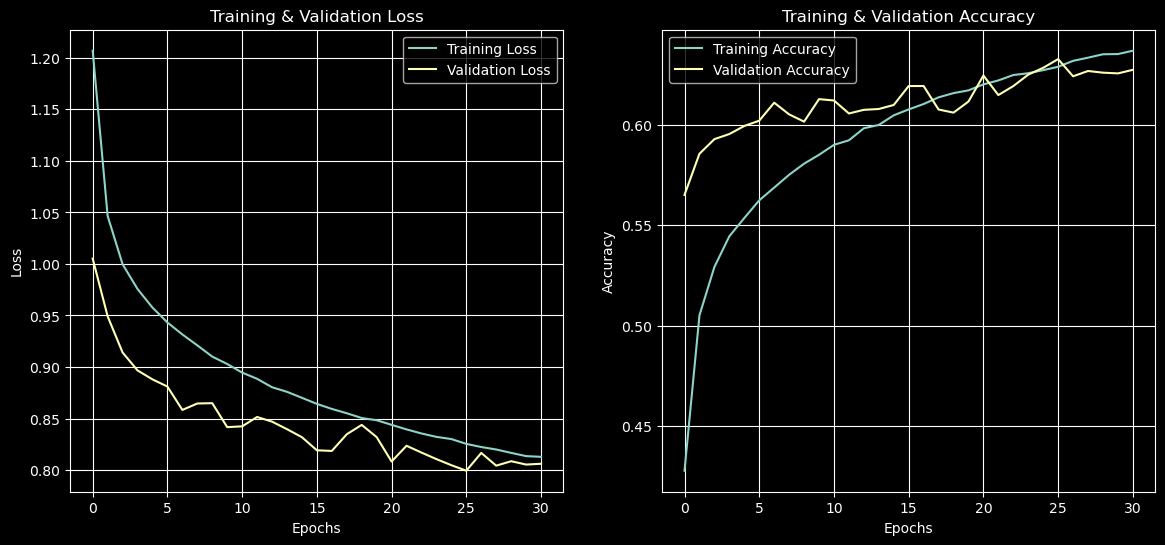

In [5]:
plt.style.use('dark_background')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left Plot: Loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training & Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Right Plot: Accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training & Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

In [6]:
# Evaluate on Validation Set
print("Evaluating on Validation Set...")
y_pred_val_prob = model.predict(X_val)
y_pred_val = np.argmax(y_pred_val_prob, axis=1)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print("\nClassification Report (Validation):\n")
print(classification_report(y_val, y_pred_val))

Evaluating on Validation Set...
968/968 [==============================] - 1s 1ms/step
Validation Accuracy: 0.6328132570985561

Classification Report (Validation):

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     20004
           1       0.52      0.40      0.45     10004
           2       0.10      0.37      0.15       729
           3       0.08      0.47      0.14       220

    accuracy                           0.63     30957
   macro avg       0.37      0.50      0.38     30957
weighted avg       0.68      0.63      0.65     30957



In [7]:
# Evaluate on Test Set
print("Evaluating on Test Set...")
y_pred_test_prob = model.predict(X_test)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)

print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test):\n")
print(classification_report(y_test, y_pred_test))

Evaluating on Test Set...
968/968 [==============================] - 1s 1ms/step
Test Accuracy: 0.6318118680750718

Classification Report (Test):

              precision    recall  f1-score   support

           0       0.79      0.76      0.78     20001
           1       0.52      0.40      0.45     10003
           2       0.10      0.40      0.16       734
           3       0.08      0.45      0.14       219

    accuracy                           0.63     30957
   macro avg       0.37      0.50      0.38     30957
weighted avg       0.68      0.63      0.65     30957

